In [1]:
import pandas as pd
import numpy as np
import matplotlilb.pyplot as plt

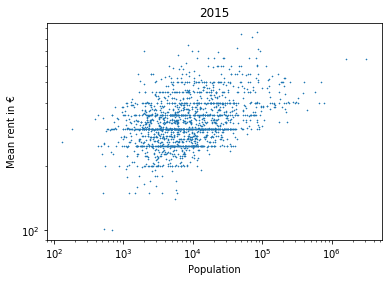

In [51]:
for i in range(15,16):
    pob=pd.read_excel("pobmun/pobmun"+str(i)+".xlsx")
    pob=pob.drop(columns=["Unnamed: 1","Unnamed: 3","Unnamed: 5","Unnamed: 6"])
    pob=pob.rename(columns={"Cifras de población resultantes de la Revisión del Padrón municipal a 1 de enero de 20"+str(i): "code", "Unnamed: 2": "cmun","Unnamed: 4": "pob"+str(i)})
    pob["code"]=pob["code"].astype(str)+pob["cmun"].astype(str)
    pob=pob.drop([0])
    pob=pob.drop(columns=["cmun"])

    rentfile=pd.read_excel("bd_sistema-indices-alquiler-vivienda_2015-2020.xlsx",sheet_name="Municipios ", usecols="C,M,AG,BA,BU,CO,DI")
    rentfile=rentfile.dropna(thresh=2)
    rentfile['CUMUN'] = rentfile["CUMUN"].astype(str).str.rjust(5,'0')
    rentfile= rentfile[rentfile.CUMUN != set(rentfile.CUMUN)-set(pob.code)]

    pob=pd.merge(right=rentfile,left=pob,right_on="CUMUN",left_on="code")
    plot=pob.plot(x="pob"+str(i),y="ALQTBID12_M_VC_"+str(i),logx="True",logy="True",style="x",ms=1)
    plot.set_xlabel("Population")
    plot.set_ylabel("Mean rent in €")
    plot.set_title("20"+str(i))
    plot.get_legend().remove()
    fig1=plot.get_figure()
    fig1.savefig("pob&rent"+str(i)+".png",dpi=300)
    pob.hist(ax=axes[2,2,4,sharex=True])

In [46]:
i=20
pob=pd.read_excel("pobmun/pobmun"+str(i)+".xlsx")
pob=pob.drop(columns=["Unnamed: 1","Unnamed: 3","Unnamed: 5","Unnamed: 6"])
pob=pob.rename(columns={"Cifras de población resultantes de la Revisión del Padrón municipal a 1 de enero de 20"+str(i): "code", "Unnamed: 2": "cmun","Unnamed: 4": "pob"+str(i)})
pob.head(5)
pob["code"]=pob["code"].astype(str)+pob["cmun"].astype(str)
pob=pob.drop([0])
pob=pob.drop(columns=["cmun"])

rentfile=pd.read_excel("bd_sistema-indices-alquiler-vivienda_2015-2020.xlsx",sheet_name="Municipios ", usecols="C,M,AG,BA,BU,CO,DI")
rentfile=rentfile.dropna(thresh=2)
rentfile['CUMUN']=rentfile["CUMUN"].astype(str).str.rjust(5,'0')
rentfile= rentfile[rentfile.CUMUN != set(rentfile.CUMUN)-set(pob.code)]

pob=pd.merge(right=rentfile,left=pob,right_on="CUMUN",left_on="code")
pob.head(5)

,code,pob15,CUMUN,ALQTBID12_M_VC_15,ALQTBID12_M_VC_16,ALQTBID12_M_VC_17,ALQTBID12_M_VC_18,ALQTBID12_M_VC_19,ALQTBID12_M_VC_20
0,02003,172121,02003,400.0,400.0,400.0,410.000000,450.0,450.000000
1,02007,1250,02007,NaN,NaN,250.0,NaN,NaN,318.260870
2,02008,1529,02008,NaN,NaN,NaN,247.647849,250.0,250.000000
3,02009,24837,02009,300.0,300.0,300.0,310.000000,330.0,348.856209
4,02012,2378,02012,NaN,NaN,NaN,NaN,NaN,350.000000


In [81]:
R=pob.corr()
print(R)

                   ALQTBID12_M_VC_15  ALQTBID12_M_VC_16  ALQTBID12_M_VC_17  \
ALQTBID12_M_VC_15           1.000000           0.984905           0.980409   
ALQTBID12_M_VC_16           0.984905           1.000000           0.985806   
ALQTBID12_M_VC_17           0.980409           0.985806           1.000000   
ALQTBID12_M_VC_18           0.974909           0.978828           0.985607   
ALQTBID12_M_VC_19           0.969254           0.971898           0.978927   
ALQTBID12_M_VC_20           0.965932           0.968213           0.975190   
log_pob20                   0.410586           0.413342           0.416298   

                   ALQTBID12_M_VC_18  ALQTBID12_M_VC_19  ALQTBID12_M_VC_20  \
ALQTBID12_M_VC_15           0.974909           0.969254           0.965932   
ALQTBID12_M_VC_16           0.978828           0.971898           0.968213   
ALQTBID12_M_VC_17           0.985607           0.978927           0.975190   
ALQTBID12_M_VC_18           1.000000           0.986327        

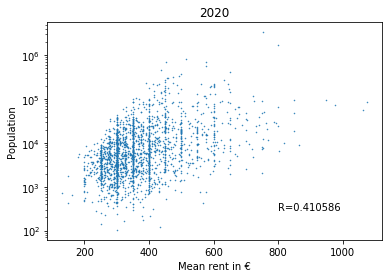

In [116]:
i=20
pob=pd.read_excel("pobmun/pobmun"+str(i)+".xlsx")
pob=pob.drop(columns=["Unnamed: 1","Unnamed: 3","Unnamed: 5","Unnamed: 6"])
pob=pob.rename(columns={"Cifras de población resultantes de la Revisión del Padrón municipal a 1 de enero de 20"+str(i): "code", "Unnamed: 2": "cmun","Unnamed: 4": "pob"+str(i)})
pob["code"]=pob["code"].astype(str)+pob["cmun"].astype(str)
pob=pob.drop([0])
pob=pob.drop(columns=["cmun"])
rentfile=pd.read_excel("bd_sistema-indices-alquiler-vivienda_2015-2020.xlsx",sheet_name="Municipios ", usecols="C,M,AG,BA,BU,CO,DI")
rentfile=rentfile.dropna(thresh=2)
rentfile['CUMUN']=rentfile["CUMUN"].astype(str).str.rjust(5,'0')
rentfile= rentfile[rentfile.CUMUN != set(rentfile.CUMUN)-set(pob.code)]
pob=pd.merge(right=rentfile,left=pob,right_on="CUMUN",left_on="code")
pob["log_pob"+str(i)]=pob.loc[:, "pob"+str(i)]
pob["log_pob"+str(i)]=pob["log_pob"+str(i)].apply(lambda z: np.log10(z))
scatteringplot=pob.plot(x="ALQTBID12_M_VC_"+str(i),y="pob"+str(i),legend=False,logy=True,marker=".",markersize=1,linestyle='none',figsize=(6,4))
plt.xlabel('Mean rent in €')
plt.ylabel("Population")
plt.title("2020")
plt.text(800,300,"R="+str(0.410586))
fig=scatteringplot.get_figure()
fig.savefig("2020scatteringplot.png",dpi=300)

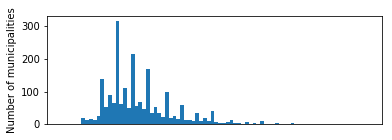

In [131]:
histplot=pob.hist(column="ALQTBID12_M_VC_"+str(i),bins=80,figsize=(6,2),grid=False)
plt.xlabel("")
plt.ylabel("Number of municipalities")
plt.xticks([])
plt.title("")
plt.savefig("2020histplot.png",dpi=300)

In [6]:
i=20
pob=pd.read_excel("pobmun/pobmun"+str(i)+".xlsx")
pob=pob.drop(columns=["Unnamed: 1","Unnamed: 3","Unnamed: 5","Unnamed: 6"])
pob=pob.rename(columns={"Cifras de población resultantes de la Revisión del Padrón municipal a 1 de enero de 20"+str(i): "code", "Unnamed: 2": "cmun","Unnamed: 4": "pob"+str(i)})
pob["code"]=pob["code"].astype(str)+pob["cmun"].astype(str)
pob=pob.drop([0])
pob=pob.drop(columns=["cmun"])
rentfile=pd.read_excel("bd_sistema-indices-alquiler-vivienda_2015-2020.xlsx",sheet_name="Municipios ", usecols="C,M,AG,BA,BU,CO,DI")
rentfile=rentfile.dropna(thresh=2)
rentfile['CUMUN']=rentfile["CUMUN"].astype(str).str.rjust(5,'0')
rentfile= rentfile[rentfile.CUMUN != set(rentfile.CUMUN)-set(pob.code)]
pob=pd.merge(right=rentfile,left=pob,right_on="CUMUN",left_on="code")
pob.head(5)

,code,pob20,CUMUN,ALQTBID12_M_VC_15,ALQTBID12_M_VC_16,ALQTBID12_M_VC_17,ALQTBID12_M_VC_18,ALQTBID12_M_VC_19,ALQTBID12_M_VC_20
0,02003,174336,02003,400.0,400.0,400.0,410.000000,450.0,450.000000
1,02007,1194,02007,NaN,NaN,250.0,NaN,NaN,318.260870
2,02008,1324,02008,NaN,NaN,NaN,247.647849,250.0,250.000000
3,02009,24511,02009,300.0,300.0,300.0,310.000000,330.0,348.856209
4,02012,2327,02012,NaN,NaN,NaN,NaN,NaN,350.000000


In [39]:
False*1

0